In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import numpy as np
import os

In [ ]:
train_dir = 'Squirrel_Classifier_Data/Training'
validation_dir = 'Squirrel_Classifier_Data/Validation'
test_dir = 'Squirrel_Classifier_Data/Testing'

img_width, img_height = 224, 224 
input_shape = (img_width, img_height, 3)

batch_size = 32
epochs = 30 
learning_rate = 0.0001

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.5, 1.5],
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse' 
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse'
)

Found 2920 images belonging to 6 classes.
Found 600 images belonging to 6 classes.
Found 300 images belonging to 6 classes.


In [ ]:
model = Sequential([
    Input(shape=input_shape),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(256, (3, 3), activation='relu'), 
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5), 
    Dense(256, activation='relu'), 
    Dropout(0.5),
    Dense(6, activation='softmax') 
])

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
checkpoint = ModelCheckpoint(
    'model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.00001 
)

In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

Epoch 1/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 37s 393ms/step - accuracy: 0.1756 - loss: 1.7844 - val_accuracy: 0.2292 - val_loss: 1.7674 - learning_rate: 1.0000e-04
Epoch 2/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2500 - loss: 1.7359 - val_accuracy: 0.2309 - val_loss: 1.7683 - learning_rate: 1.0000e-04
Epoch 3/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 36s 392ms/step - accuracy: 0.2374 - loss: 1.7365 - val_accuracy: 0.3524 - val_loss: 1.5952 - learning_rate: 1.0000e-04
Epoch 4/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3125 - loss: 1.6367 - val_accuracy: 0.3385 - val_loss: 1.6052 - learning_rate: 1.0000e-04
Epoch 5/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 36s 392ms/step - accuracy: 0.2991 - loss: 1.6706 - val_accuracy: 0.3472 - val_loss: 1.5289 - learning_rate: 1.0000e-04
Epoch 6/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2812 - loss: 1.5630 - val_accuracy: 0.3507 - val_loss: 1.5262 - learning_rate: 1.0000e-04
Epoch 7/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 36s 393ms/step - accuracy:

In [20]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 237ms/step - accuracy: 0.4691 - loss: 1.3127
Test accuracy: 0.4767
Test loss: 1.3225


In [21]:
model.save('model2.keras')

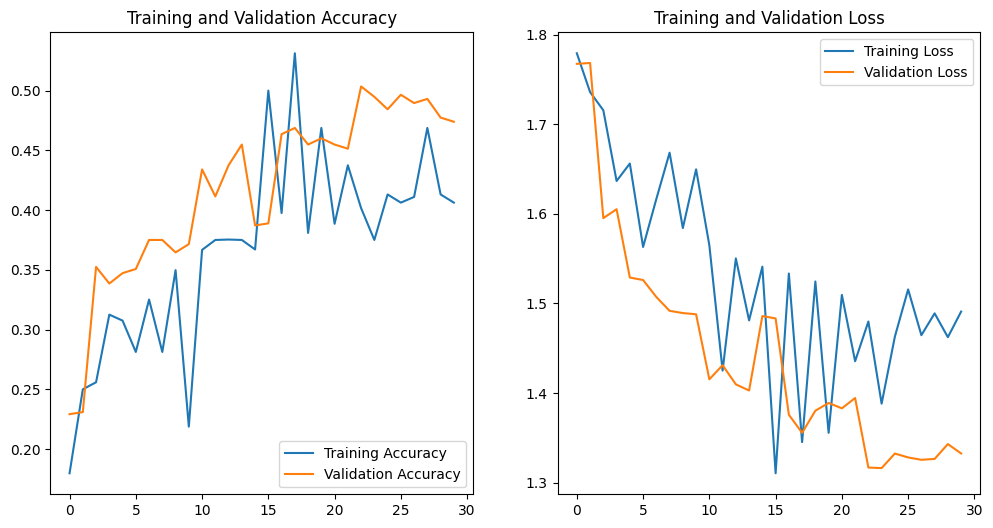

In [22]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()